In [10]:
from scipy.signal import butter, filtfilt, iirnotch, freqz
import os
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Band-pass filter
def bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = filtfilt(b, a, data)
    return y

# Notch filter
def notch_filter(data, cut_freq, fs, Q=30):
    nyq = 0.5 * fs
    freq = cut_freq / nyq
    b, a = iirnotch(freq, Q)
    y = filtfilt(b, a, data)
    return y

def filter03050(Ipsignal):
    sampling_rate = 250  # Hz
    # fft_signal = np.fft.fft(Ipsignal)
    # frequencies = np.fft.fftfreq(len(Ipsignal), 1/sampling_rate)
    filtered_signal = bandpass_filter(Ipsignal, 1, 30, sampling_rate)          # band-pass filter 0-30 Hz
    filtered_signal = notch_filter(filtered_signal, 50, sampling_rate)       # notch filter 50 Hz
    return filtered_signal

def unique_name(Datapath):
    all_name = os.listdir(Datapath)
    new = []
    for un in all_name:
        i = un.replace("_data_time_series.npy","").replace("_data_time_stamps.npy","").replace("_label_time_series.npy","").replace("_label_time_stamps.npy","")
        new.append(i)
        unique_name = list(set(new))
    return unique_name

def check_different_duration(label_time_stamps):
    keep_time = []
    start_time = 0
    for current_time in list(label_time_stamps):
        keep_time.append(current_time-start_time)
        start_time = current_time
    keep_time = keep_time[1:]
    avgtime = sum(keep_time)/len(keep_time)
    stat = True
    for etime in keep_time:
        if 6.8 <= etime <= 7.5:
            stat = True
        else:
            stat = False
            break
    return stat,avgtime

file_path = "/content/mini_training"
unique_name = unique_name(file_path)

In [6]:
unique_name

['s1_d2_p002_005', 's1_d2_p002_002']

In [7]:
name = "s1_d2_p002_005"

In [9]:
signals           = np.load(os.path.join(file_path,name+"_data_time_series.npy"))
times             = np.load(os.path.join(file_path,name+"_data_time_stamps.npy"))
label_time_series = np.load(os.path.join(file_path,name+"_label_time_series.npy"))
label_time_stamps = np.load(os.path.join(file_path,name+"_label_time_stamps.npy"))
# signals = signals[:,:8]

In [25]:
croped = signals[:63050]

SyntaxError: invalid syntax (<ipython-input-25-eb7ebd3c0141>, line 1)

In [29]:
times[0]

63026.08741993066

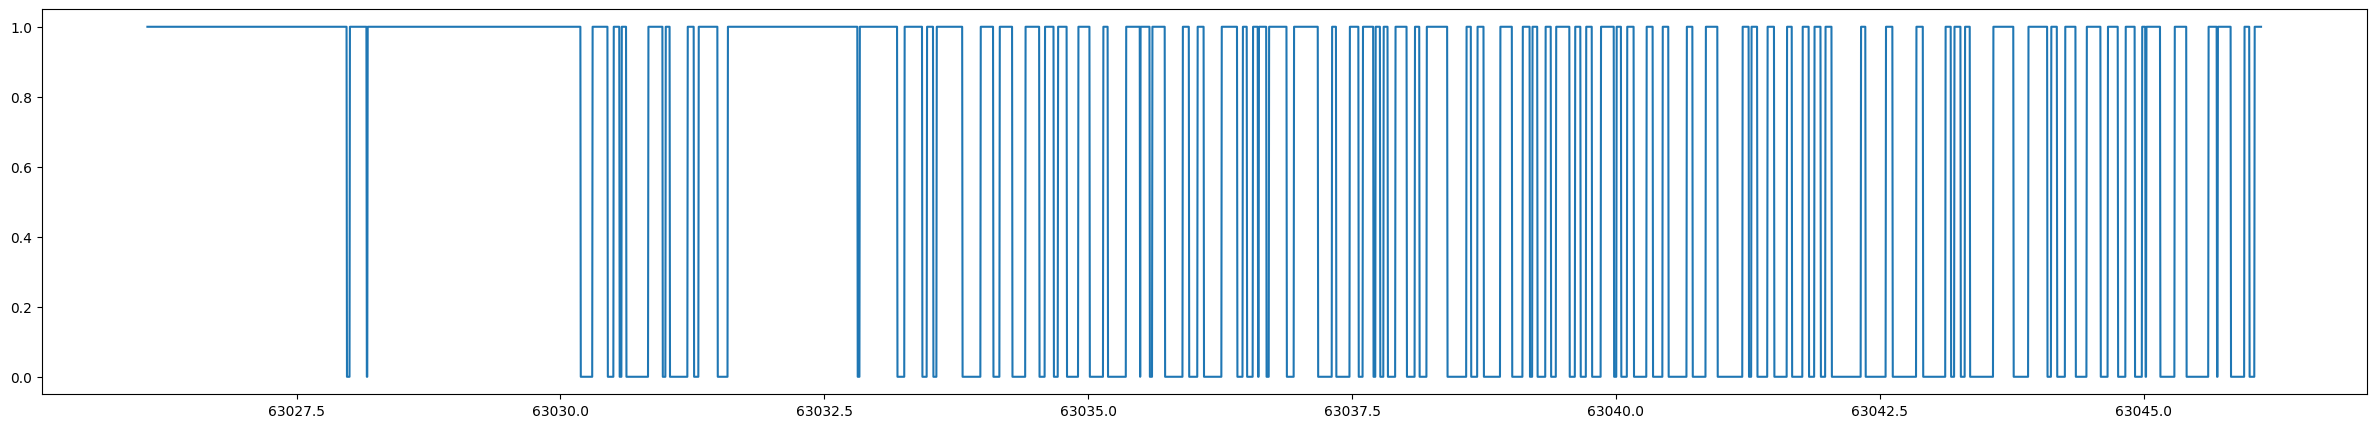

In [33]:
plt.figure(figsize=(30,5))
plt.plot(times[0:5000],signals[0:5000,16])

In [79]:
drt = 600
windows = signals[0:drt,16]
s1      = signals[0:drt,1]
time    = times[0:drt]

In [82]:
s1

array([-159929.88, -159636.34, -159413.28, -159547.83, -159790.75,
       -159925.75, -159632.86, -159409.44, -159541.03, -159787.8 ,
       -159924.86, -159630.89, -159412.11, -159548.55, -159796.03,
       -159930.94, -159635.1 , -159411.39, -159545.16, -159795.67,
       -159940.33, -159646.81, -159420.34, -159554.72, -159802.11,
       -159936.84, -159642.16, -159417.48, -159548.19, -159791.56,
       -159926.47, -159634.11, -159412.11, -159549.98, -159800.67,
       -159935.05, -159638.77, -159420.61, -159557.67, -159802.47,
       -159928.61, -159631.16, -159412.47, -159547.2 , -159799.52,
       -159937.47, -159637.42, -159411.05, -159543.72, -159793.88,
       -159929.52, -159635.19, -159420.7 , -159555.8 , -159798.89,
       -159933.1 , -159641.89, -159419.53, -159549.62, -159801.22,
       -159936.22, -159638.84, -159415.78, -159551.6 , -159803.  ,
       -159930.05, -159626.69, -159410.5 , -159553.73, -159803.62,
       -159931.75, -159630.36, -159410.33, -159553.11, -159810

In [65]:
Sv = s1*windows

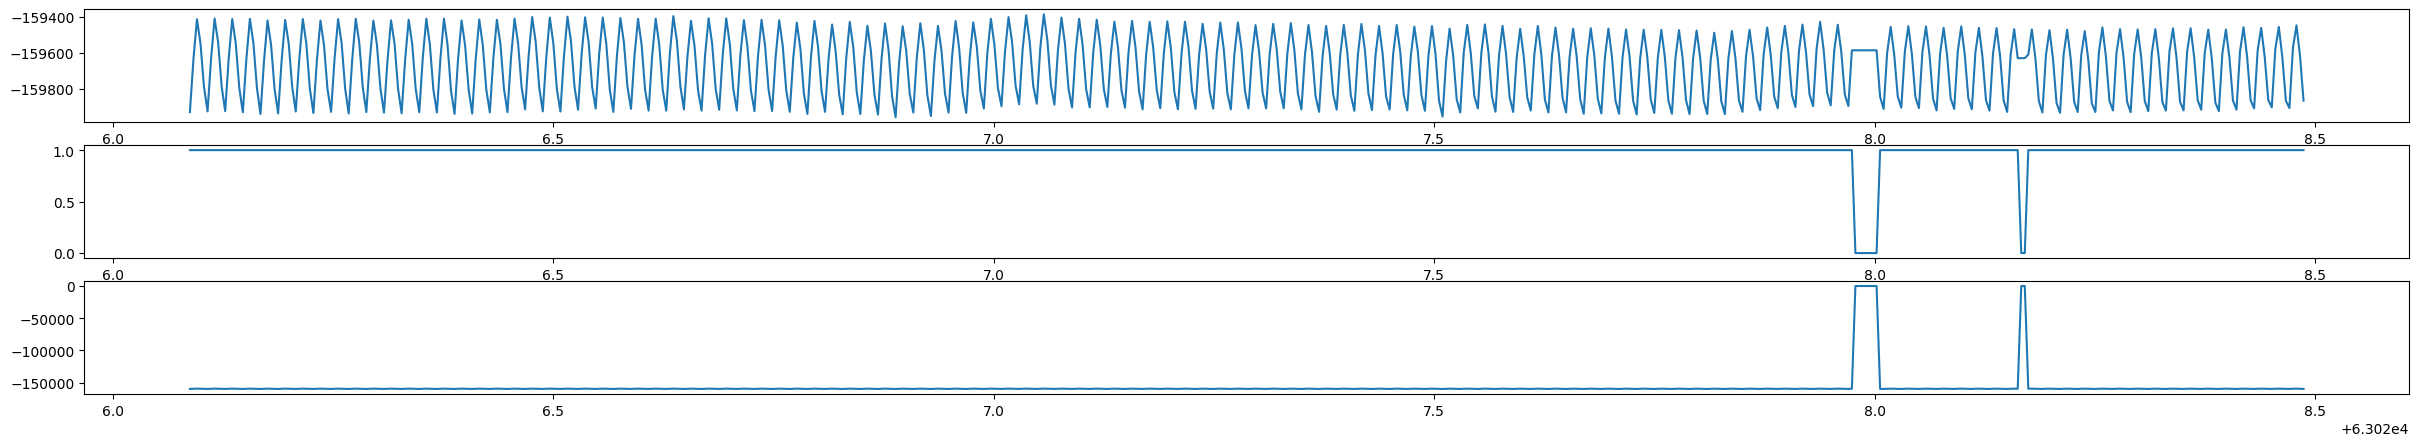

In [80]:
plt.figure(figsize=(30,5))
plt.subplot(311)
plt.plot(time,s1)
plt.subplot(312)
plt.plot(time,windows)
plt.subplot(313)
plt.plot(time,s1*windows)

In [92]:
windows = signals[:,16]

In [93]:
windows = signals[:,16]
percentage_ones = (np.sum(windows==1)/len(windows))*100
percentage_ones

32.64068966701585

<hr>

# Create function to filter one percent

In [94]:
from scipy.signal import butter, filtfilt, iirnotch, freqz
import os
import numpy as np

In [96]:
# Band-pass filter
def bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = filtfilt(b, a, data)
    return y

# Notch filter
def notch_filter(data, cut_freq, fs, Q=30):
    nyq = 0.5 * fs
    freq = cut_freq / nyq
    b, a = iirnotch(freq, Q)
    y = filtfilt(b, a, data)
    return y

def filter03050(Ipsignal):
    sampling_rate = 250  # Hz
    # fft_signal = np.fft.fft(Ipsignal)
    # frequencies = np.fft.fftfreq(len(Ipsignal), 1/sampling_rate)
    filtered_signal = bandpass_filter(Ipsignal, 1, 30, sampling_rate)          # band-pass filter 0-30 Hz
    filtered_signal = notch_filter(filtered_signal, 50, sampling_rate)       # notch filter 50 Hz
    return filtered_signal

def unique_name(Datapath):
    all_name = os.listdir(Datapath)
    new = []
    for un in all_name:
        i = un.replace("_data_time_series.npy","").replace("_data_time_stamps.npy","").replace("_label_time_series.npy","").replace("_label_time_stamps.npy","")
        new.append(i)
        unique_name = list(set(new))
    return unique_name

def check_different_duration(label_time_stamps):
    keep_time = []
    start_time = 0
    for current_time in list(label_time_stamps):
        keep_time.append(current_time-start_time)
        start_time = current_time
    keep_time = keep_time[1:]
    avgtime = sum(keep_time)/len(keep_time)
    stat = True
    for etime in keep_time:
        if 6.8 <= etime <= 7.5:
            stat = True
        else:
            stat = False
            break
    return stat,avgtime

file_path = "/content/mini_training"
unique_name = unique_name(file_path)

In [99]:
data_dataset  = []
label_dataset = []
for name in unique_name:
    # print(name)
    signals_series    = np.load(os.path.join(file_path,name+"_data_time_series.npy"))
    times             = np.load(os.path.join(file_path,name+"_data_time_stamps.npy"))
    label_time_series = np.load(os.path.join(file_path,name+"_label_time_series.npy"))
    label_time_stamps = np.load(os.path.join(file_path,name+"_label_time_stamps.npy"))
    signals = signals_series[:,:5]
    windows = signals_series[:,16]
    percentage_ones = (np.sum(windows==1)/len(windows))*100
    print(percentage_ones)

32.64068966701585
20.005957478497226


<hr>

In [100]:
!pip install -q kaggle
import json

data = {"username":"tunkedsaro","key":"ff3d00dc680ff94caf6f8d4d9bcd3168"}
json_data = json.dumps(data)

# Write the JSON string to a file
file_path = "/content/kaggle.json"
with open(file_path, 'w') as json_file:
    json_file.write(json_data)

!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/ #copy api key ---- depend on your directory -- my directory is .../colab/..
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list
!kaggle competitions download -c brain-motor-imagery-classification

ref                                                             title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rahulvyasm/netflix-movies-and-tv-shows                          Netflix Movies and TV Shows                        1MB  2024-04-10 09:48:38          18889        412  1.0              
ashishkumarak/netflix-reviews-playstore-daily-updated           Netflix Reviews [DAILY UPDATED]                   12MB  2024-05-15 23:27:44           1096         31  1.0              
sahirmaharajj/school-student-daily-attendance                   School Student Daily Attendance                    2MB  2024-04-29 19:29:56           4471         93  1.0              
sahirmaharajj/college-exam-results-sat                          College Exa

In [102]:
# Band-pass filter
def bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = filtfilt(b, a, data)
    return y

# Notch filter
def notch_filter(data, cut_freq, fs, Q=30):
    nyq = 0.5 * fs
    freq = cut_freq / nyq
    b, a = iirnotch(freq, Q)
    y = filtfilt(b, a, data)
    return y

def filter03050(Ipsignal):
    sampling_rate = 250  # Hz
    # fft_signal = np.fft.fft(Ipsignal)
    # frequencies = np.fft.fftfreq(len(Ipsignal), 1/sampling_rate)
    filtered_signal = bandpass_filter(Ipsignal, 1, 30, sampling_rate)          # band-pass filter 0-30 Hz
    filtered_signal = notch_filter(filtered_signal, 50, sampling_rate)       # notch filter 50 Hz
    return filtered_signal

def unique_name(Datapath):
    all_name = os.listdir(Datapath)
    new = []
    for un in all_name:
        i = un.replace("_data_time_series.npy","").replace("_data_time_stamps.npy","").replace("_label_time_series.npy","").replace("_label_time_stamps.npy","")
        new.append(i)
        unique_name = list(set(new))
    return unique_name

def check_different_duration(label_time_stamps):
    keep_time = []
    start_time = 0
    for current_time in list(label_time_stamps):
        keep_time.append(current_time-start_time)
        start_time = current_time
    keep_time = keep_time[1:]
    avgtime = sum(keep_time)/len(keep_time)
    stat = True
    for etime in keep_time:
        if 6.8 <= etime <= 7.5:
            stat = True
        else:
            stat = False
            break
    return stat,avgtime

file_path = "/content/train/train"
unique_name = unique_name(file_path)

In [103]:
unique_name.remove("s1_d2_p002_003")          # sameple ห่าง
unique_name.remove("s1_d2_p006_008")          # label != 30
unique_name.remove("s2_d2_p002_006")          # label != 30

In [120]:
data_dataset  = []
label_dataset = []

percent = []
for name in unique_name:
    # print(name)
    signals_series    = np.load(os.path.join(file_path,name+"_data_time_series.npy"))
    times             = np.load(os.path.join(file_path,name+"_data_time_stamps.npy"))
    label_time_series = np.load(os.path.join(file_path,name+"_label_time_series.npy"))
    label_time_stamps = np.load(os.path.join(file_path,name+"_label_time_stamps.npy"))
    signals = signals_series[:,:5]
    windows = signals_series[:,16]
    percentage_ones = (np.sum(windows==1)/len(windows))
    if percentage_ones >= 0.9:
        percent.append(percentage_ones)

135


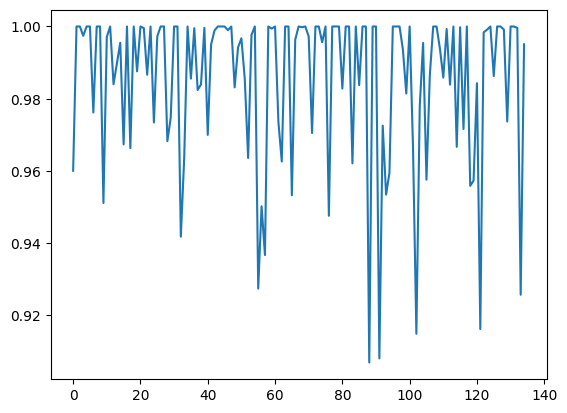

In [121]:
print(len(percent))
plt.plot(percent)

<hr>

In [ ]:
from scipy.signal import butter, filtfilt, iirnotch, freqz
import os
import numpy as np

In [157]:
# Band-pass filter
def bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = filtfilt(b, a, data)
    return y

# Notch filter
def notch_filter(data, cut_freq, fs, Q=30):
    nyq = 0.5 * fs
    freq = cut_freq / nyq
    b, a = iirnotch(freq, Q)
    y = filtfilt(b, a, data)
    return y

def filter03050(Ipsignal):
    sampling_rate = 250  # Hz
    # fft_signal = np.fft.fft(Ipsignal)
    # frequencies = np.fft.fftfreq(len(Ipsignal), 1/sampling_rate)
    filtered_signal = bandpass_filter(Ipsignal, 1, 30, sampling_rate)          # band-pass filter 0-30 Hz
    filtered_signal = notch_filter(filtered_signal, 50, sampling_rate)       # notch filter 50 Hz
    return filtered_signal

def unique_name(Datapath):
    all_name = os.listdir(Datapath)
    new = []
    for un in all_name:
        i = un.replace("_data_time_series.npy","").replace("_data_time_stamps.npy","").replace("_label_time_series.npy","").replace("_label_time_stamps.npy","")
        new.append(i)
        unique_name = list(set(new))
    return unique_name

def check_different_duration(label_time_stamps):
    keep_time = []
    start_time = 0
    for current_time in list(label_time_stamps):
        keep_time.append(current_time-start_time)
        start_time = current_time
    keep_time = keep_time[1:]
    avgtime = sum(keep_time)/len(keep_time)
    stat = True
    for etime in keep_time:
        if 6.8 <= etime <= 7.5:
            stat = True
        else:
            stat = False
            break
    return stat,avgtime

file_path = "/content/train/train"
unique_name = unique_name(file_path)

In [158]:
unique_name.remove("s1_d2_p002_003")          # sameple ห่าง
unique_name.remove("s1_d2_p006_008")          # label != 30
unique_name.remove("s2_d2_p002_006")          # label != 30

In [159]:
def filter_one(windows,percent_pass):
    percentage_ones = (np.sum(windows==1)/len(windows))
    if percentage_ones >= percent_pass:
        return True
    return False

In [160]:
data_dataset  = []
label_dataset = []
for name in unique_name:
    # print(name)
    signals_series    = np.load(os.path.join(file_path,name+"_data_time_series.npy"))
    times             = np.load(os.path.join(file_path,name+"_data_time_stamps.npy"))
    label_time_series = np.load(os.path.join(file_path,name+"_label_time_series.npy"))
    label_time_stamps = np.load(os.path.join(file_path,name+"_label_time_stamps.npy"))
    signals = signals_series[:,:5]
    windows = signals_series[:,16]
    if not(filter_one(windows,1)):            # กรอง คุณภาพ 0,1
        continue
    stat,avgtime = check_different_duration(label_time_stamps)
    if not(stat):                               # กรอง ระยะห่างของ time_stamp
        continue
    if filter!=None:                            # Apply filter
        filtered_signal = []
        Dim = signals.shape[1]
        # print(Dim)
        for i in range(Dim):
            # print(f"{i} : {signals[:,i]}")
            filtered_signal.append(filter03050(signals[:,i]))
        signals = np.array(filtered_signal).T
    # sample_point = int(round(avgtime))
    # datapoint = 250 * sample_point                   # 250 Hz * 7 s
    for index in range(30):
        # start_point = index * datapoint
        # end_point = (index + 1) * datapoint
        # if end_point <= signals.shape[0]:  # Check to ensure slice is within the data range
        #     data_dataset.append(signals[start_point:end_point])
        # else:
        #     break
        sn = signals[1750*i:1750*(i+1)]
        if sn.shape[0]!=30 and sn.shape[1]!=5:
            print(name,"error")
        data_dataset.append(sn)
    label_dataset.append(label_time_series)
data_dataset = np.stack(data_dataset)

label_dataset = np.concatenate(label_dataset)
label_dataset = label_dataset.flatten().tolist()

In [161]:
# Demension check
data_dataset.shape

(1530, 1750, 5)

In [162]:
label_dataset = np.array(label_dataset)
label_dataset

array([120, 110, 150, ..., 150, 120, 110])

In [163]:
label_dataset.shape

(1530,)

<hr>

In [164]:
# pip install braindecode

In [165]:
from braindecode.models.util import models_dict
print(f'All the Braindecode models:\n{list(models_dict.keys())}')

All the Braindecode models:
['ATCNet', 'Deep4Net', 'DeepSleepNet', 'EEGConformer', 'EEGITNet', 'EEGInception', 'EEGInceptionERP', 'EEGInceptionMI', 'EEGNetv1', 'EEGNetv4', 'EEGResNet', 'HybridNet', 'ShallowFBCSPNet', 'SleepStagerBlanco2020', 'SleepStagerChambon2018', 'SleepStagerEldele2021', 'TCN', 'TIDNet', 'USleep']


In [166]:
from braindecode.models import ShallowFBCSPNet              # Import the model from braindecode * There are many model that available
import mne
import numpy as np

In [167]:
# Train spect config
model = ShallowFBCSPNet(
    n_chans   = 5,
    n_times   = 1750,
    n_outputs = 3,
    final_conv_length='auto',
)
print(model)

Layer (type (var_name):depth-idx)        Input Shape               Output Shape              Param #                   Kernel Shape
ShallowFBCSPNet (ShallowFBCSPNet)        [1, 5, 1750]              [1, 3]                    --                        --
├─Ensure4d (ensuredims): 1-1             [1, 5, 1750]              [1, 5, 1750, 1]           --                        --
├─Rearrange (dimshuffle): 1-2            [1, 5, 1750, 1]           [1, 1, 1750, 5]           --                        --
├─CombinedConv (conv_time_spat): 1-3     [1, 1, 1750, 5]           [1, 40, 1726, 1]          9,040                     --
├─BatchNorm2d (bnorm): 1-4               [1, 40, 1726, 1]          [1, 40, 1726, 1]          80                        --
├─Expression (conv_nonlin_exp): 1-5      [1, 40, 1726, 1]          [1, 40, 1726, 1]          --                        --
├─AvgPool2d (pool): 1-6                  [1, 40, 1726, 1]          [1, 40, 111, 1]           --                        [75, 1]
├─Express

/usr/local/lib/python3.10/dist-packages/braindecode/models/base.py:180: UserWarning: LogSoftmax final layer will be removed! Please adjust your loss function accordingly (e.g. CrossEntropyLoss)!
  warnings.warn("LogSoftmax final layer will be removed! " +


In [168]:
data_dataset.shape

(1530, 1750, 5)

In [171]:
data_dataset = data_dataset.reshape(data_dataset.shape[0], 5, 1750)
data_dataset.shape

(1530, 5, 1750)

In [172]:
label_dataset.shape

(1530,)

In [173]:
label_dataset = np.array(label_dataset)
label_dataset

array([120, 110, 150, ..., 150, 120, 110])

In [174]:
# Map value
mapping = {110: 0,
           120: 1,
           150: 2}

mapped_label = np.vectorize(mapping.get)(label_dataset)
label = np.array(mapped_label)
label

array([1, 0, 2, ..., 2, 1, 0])

In [175]:
info = mne.create_info(
    ch_names = ['c1','c2','c3','c4','c5'], sfreq=250., ch_types="eeg"
)
# data_dataset  # 100 epochs, 8 channels, 7 seconds (@250Hz)
epochs = mne.EpochsArray(data_dataset, info=info)


Not setting metadata
1530 matching events found
No baseline correction applied
0 projection items activated


In [176]:
from skorch.dataset import ValidSplit
from braindecode import EEGClassifier

In [177]:
net = EEGClassifier(
    'ShallowFBCSPNet',
    module__final_conv_length='auto',
    max_epochs=10,
    train_split=ValidSplit(0.2),
    # To train a neural network you need validation split, here, we use 20%.
)
# Train model
net.fit(epochs, label)

/usr/local/lib/python3.10/dist-packages/braindecode/models/base.py:180: UserWarning: LogSoftmax final layer will be removed! Please adjust your loss function accordingly (e.g. CrossEntropyLoss)!
  warnings.warn("LogSoftmax final layer will be removed! " +


  epoch    train_loss    valid_acc    valid_loss      dur
-------  ------------  -----------  ------------  -------
      1        9.0722       0.3137        4.7818  17.4380
      2        5.1635       0.3693        1.9893  16.7635
      3        2.6794       0.3431        2.4207  15.8175
      4        3.0540       0.3007        3.0512  17.1371
      5        2.5002       0.3497        2.6177  16.5814
      6        2.2177       0.2876        2.5790  16.2857
      7        2.2831       0.3333        1.7156  16.5350
      8        2.0761       0.2974        2.3244  15.9476
      9        2.1424       0.2843        1.8330  15.8927
     10        2.1003       0.2549        3.2827  15.9341


<class 'braindecode.classifier.EEGClassifier'>[initialized](
  module_=============================================================================================================================================
  Layer (type (var_name):depth-idx)        Input Shape               Output Shape              Param #                   Kernel Shape
  ShallowFBCSPNet (ShallowFBCSPNet)        [1, 5, 1750]              [1, 3]                    --                        --
  ├─Ensure4d (ensuredims): 1-1             [1, 5, 1750]              [1, 5, 1750, 1]           --                        --
  ├─Rearrange (dimshuffle): 1-2            [1, 5, 1750, 1]           [1, 1, 1750, 5]           --                        --
  ├─CombinedConv (conv_time_spat): 1-3     [1, 1, 1750, 5]           [1, 40, 1726, 1]          9,040                     --
  ├─BatchNorm2d (bnorm): 1-4               [1, 40, 1726, 1]          [1, 40, 1726, 1]          80                        --
  ├─Expression (conv_nonlin_exp): 

<hr>

<h1>Test model</h1>

In [178]:
from scipy.signal import butter, filtfilt, iirnotch, freqz
import os

In [180]:
data_dataset  = []
label_dataset = []
file_path = "/content/train/train"
unique_name = ["s1_d2_p002_002"]
for name in unique_name:
    print(name)
    signals           = np.load(os.path.join(file_path,name+"_data_time_series.npy"))
    times             = np.load(os.path.join(file_path,name+"_data_time_stamps.npy"))
    label_time_series = np.load(os.path.join(file_path,name+"_label_time_series.npy"))
    label_time_stamps = np.load(os.path.join(file_path,name+"_label_time_stamps.npy"))
    signals = signals[:,:5]
    print(signals.shape)
    stat,avgtime = check_different_duration(label_time_stamps)
    if not(stat):
        continue
    # print("Avg time",self.avgtime)
    if filter!=None:
        filtered_signal = []
        Dim = signals.shape[1]
        print(Dim)
        for i in range(Dim):
            # print(f"{i} : {signals[:,i]}")
            filtered_signal.append(filter03050(signals[:,i]))
        signals = np.array(filtered_signal).T
    sample_point = int(round(avgtime))
    datapoint = 250 * sample_point                   # 250 Hz * 7 s
    for index in range(30):
        start_point = index * datapoint
        end_point = (index + 1) * datapoint
        if end_point <= signals.shape[0]:  # Check to ensure slice is within the data range
            data_dataset.append(signals[start_point:end_point])
        else:
            break
    label_dataset.append(label_time_series)
data_dataset = np.stack(data_dataset)
print(data_dataset.shape)
label_dataset = np.concatenate(label_dataset)
label_dataset = label_dataset.flatten().tolist()

s1_d2_p002_002
(53714, 5)
5
(30, 1750, 5)


In [182]:
data_dataset = data_dataset.reshape(30,5,1750)
data_dataset.shape

(30, 5, 1750)

In [183]:
test_epochs = mne.EpochsArray(data_dataset,info=info)

Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated


In [184]:
# Get predictions from the trained model
predictions = net.predict(test_epochs)
probabilities = net.predict_proba(test_epochs)

In [185]:
# Map value
mapping = {110: 0, 120: 1, 150: 2}

mapped_label = np.vectorize(mapping.get)(label_dataset)
print(mapped_label)

[1 0 2 2 1 0 1 0 2 2 1 0 1 2 0 2 1 0 1 0 2 2 1 0 2 1 0 2 1 0]


In [186]:
print("Predictions:", predictions)
print("Probabilities:", probabilities)

Predictions: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Probabilities: [[2.9864628e-11 3.1726399e-11 1.0000000e+00]
 [1.7155636e-11 3.8047288e-11 1.0000000e+00]
 [1.2010672e-07 5.5201134e-08 9.9999988e-01]
 [6.1146392e-12 2.2681479e-12 1.0000000e+00]
 [1.2493196e-15 3.1620432e-15 1.0000000e+00]
 [4.2961935e-15 4.4846134e-15 1.0000000e+00]
 [1.1989596e-14 2.9568529e-15 1.0000000e+00]
 [2.4609502e-14 8.4994327e-15 1.0000000e+00]
 [4.4085016e-13 1.3052626e-13 1.0000000e+00]
 [4.0933602e-12 1.4783068e-12 1.0000000e+00]
 [6.6355418e-16 8.4820349e-16 1.0000000e+00]
 [3.7704044e-16 2.2885077e-15 1.0000000e+00]
 [2.2028364e-14 2.5238983e-14 1.0000000e+00]
 [1.0555329e-13 3.6957193e-14 1.0000000e+00]
 [1.2114826e-15 2.5864613e-15 1.0000000e+00]
 [1.8603493e-14 8.9233473e-15 1.0000000e+00]
 [1.9640886e-14 1.3482741e-13 1.0000000e+00]
 [1.5607906e-11 1.4393165e-11 1.0000000e+00]
 [1.2415962e-12 4.8530464e-12 1.0000000e+00]
 [2.7707299e-13 8.8475500e-13 1.0000000e+00]
 [1.060857

In [187]:
Cm = 0
for i,j in zip(mapped_label,predictions):
    print(i,j,i==j)
    if i==j:
        Cm+=1
print(f"{Cm}/{len(predictions)}")

1 2 False
0 2 False
2 2 True
2 2 True
1 2 False
0 2 False
1 2 False
0 2 False
2 2 True
2 2 True
1 2 False
0 2 False
1 2 False
2 2 True
0 2 False
2 2 True
1 2 False
0 2 False
1 2 False
0 2 False
2 2 True
2 2 True
1 2 False
0 2 False
2 2 True
1 2 False
0 2 False
2 2 True
1 2 False
0 2 False
10/30


<hr>

<h1>Prediction</h1>

In [188]:
import pandas as pd

In [189]:
sample_submission = pd.read_csv("/content/sample_submission.csv")
sample_submission

,id,predict
0,a0dfb1f6-a76b-404f-a04a-b61e955ce1ef,110.0
1,51afd110-7556-4a7d-b6d2-68e46256f267,150.0
2,eb229854-1a14-4e1f-8e52-470edbec47c9,150.0
3,8fa74efe-f269-415e-a968-1a92e7c66fe6,NaN
4,7b209881-a1dd-4aa3-a06a-037908b07bfa,NaN
...,...,...
475,69e84db3-0019-4e38-90fc-968f45747a16,NaN
476,d18d7d80-78fa-402a-ba1c-e35d72382b18,NaN
477,0a532391-dd42-413f-ab15-798960de95d6,NaN
478,0c02ad4f-de15-48cb-ad31-0925e69bfe97,NaN


In [192]:
test_file_path = '/content/test'
for ss in sample_submission["id"][3:]:
    file_name = os.path.join(test_file_path,ss+".npy")
    signals   = np.load(file_name)[:,:5]
    filtered_signal = []
    Dim = signals.shape[1]
    for i in range(Dim):
        filtered_signal.append(filter03050(signals[:,i]))
    signals = np.array(filtered_signal).T
    signals_reshape = signals.T.reshape(1, 5, signals.shape[0])

    test_epochs = mne.EpochsArray(signals_reshape,info=info)
    predictions = net.predict(test_epochs)
    sample_submission.loc[sample_submission['id'] == ss, 'predict'] = predictions[0]

Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1 matching events found
No baselin

In [193]:
sample_submission['predict'] = sample_submission['predict'].apply(lambda ip: "110" if ip == 0 else "120" if ip == 1 else "150" if ip == 2 else str(int(ip)))

In [194]:
sample_submission

,id,predict
0,a0dfb1f6-a76b-404f-a04a-b61e955ce1ef,110
1,51afd110-7556-4a7d-b6d2-68e46256f267,150
2,eb229854-1a14-4e1f-8e52-470edbec47c9,150
3,8fa74efe-f269-415e-a968-1a92e7c66fe6,150
4,7b209881-a1dd-4aa3-a06a-037908b07bfa,120
...,...,...
475,69e84db3-0019-4e38-90fc-968f45747a16,150
476,d18d7d80-78fa-402a-ba1c-e35d72382b18,150
477,0a532391-dd42-413f-ab15-798960de95d6,150
478,0c02ad4f-de15-48cb-ad31-0925e69bfe97,150


In [196]:
i110 = 0
i120 = 0
i150 = 0
for item in list(sample_submission['predict']):
    if item == '110':
        i110+=1
    elif item == '120':
        i120+=1
    elif item == '150':
        i150+=1

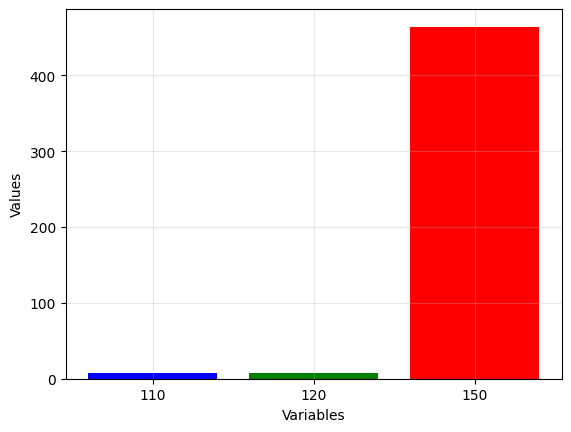

In [197]:
# Labels and values for the bar plot
labels = ['110', '120', '150']
values = [i110, i120, i150]

# Create the bar plot
plt.bar(labels, values, color=['blue', 'green', 'red'])

# Add title and labels to the plot
plt.xlabel('Variables')
plt.ylabel('Values')
plt.grid(alpha=0.3)

# Display the plot
plt.show()